*   모듈(module): 특정 기능을 py. 파일 단위로 작성한 것
*   패키지(package): 특정 기능과 관련된 여러 모듈을 묶은 것
*   파이썬 표준 라이브러리(libarary): 파이썬에 기본으로 설치된 모듈과 패키지 


#글씨체 다운로드
##### 블록을 실행한 후에 런타임 재시작을 해줘야함

In [ ]:
!sudo apt-get install -y fonts-nanum #글씨체 
!sudo fc-cache -fv #글씨체
!rm ~/.cache/matplotlib -rf #글씨체

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,398 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

#구글 드라이브 연동

In [ ]:
from google.colab import drive  # google.colab 에서 drive만 가져오기 
drive.mount('/content/drive') 

- 실행시 구글 계정 로그인 팝업창이 나타남 -> 로그인 후 인증코드 복사 후  authorization code를 입력하라는 빈 칸에 입력 -> Mounted at /content/drive 메시지 출력이 뜬다면 드라이브 마운트에 성공
- for 모듈 import 변수/함수/클래스/*
-> 모듈의 일부만 가져올 때 사용


#데이터 불러오기, 전처리

In [ ]:
import pandas as pd #pandas 모듈을 pd로 지정
import numpy as np #numpy 모듈을 np로 지정    
import matplotlib.pyplot as plt #그래프 그리기 모듈(matplotlib.pyplot)을 plt로 지정 
plt.rc('font', family='NanumBarunGothic') #matplotlib의 글씨체 변경 - 한글 깨짐 방지(이후 모든 그래프에서 해당 설정 변경 적용)
plt.rcParams['axes.unicode_minus'] = False #matplotlib의 글씨체 - 한글 깨짐 방지 
from matplotlib import font_manager, rc #글꼴 모듈, matplotlib 모듈에서 font_manager,rc만 가져옴

covid19_raw = pd.read_csv('/content/drive/MyDrive/python_code/code1/서울시 코로나19 확진자 발생동향.csv', encoding = 'cp949') #한글로 된 csv파일을 불러올떄 인코딩 = cp949
#/content/drive/MyDrive/python_code/code1/서울시 코로나19 확진자 발생동향.csv : 구글 드라이브에서의 csv파일 경로
# sp949 인코딩 방식으로 위 csv 파일을 구글 드라이프에서 가져오기 

* import 모듈 as 이름 : 모듈을 이름으로 지정 
> 항상 모듈을 타이핑 하는 번거로움을 줄이기 위하여 사용 
- rc함수: 글꼴 변경하는 함수
> matplotlib는 기본 글꼴이 영문 글꼴, 깨짐 방지 위해 글씨체 변경 필요
- rcParams: 미리 지정해놓은 스타일을 사용하지 않고 그래프에 새로운 스타일 지정 
> 축(axis)과 레이블(label)을 표시할 때 마이너스 기호(-)가 깨지는 것을 방지
> matplotlib에서는 기본적으로 마이너스 기호(-)를 표시할 때 유니코드(unicode)를 사용
유니코드에서는 마이너스 기호가 일반적으로 '-'(하이픈)이 아닌 '−'(마이너스 기호)로 표시됩니다. but, 일부 폰트에서는 이 유니코드 마이너스 기호가 지원X -> 마이너스 기호가 깨져서 보일 수 있음
>이 코드 사용시 기본적으로 사용하는 유니코드 대신 ASCII 코드의 '-'(하이픈)를 사용하도록 강제할 수 있음 -> 마이너스 기호가 깨지는 현상을 방지

In [ ]:
covid19_raw

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자,서울시 당일사망자,전국 당일 사망자
0,2022.09.25.00,4800846,4888,0,NaN,NaN,5460,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,73.0
1,2022.09.24.00,4795958,5651,0,NaN,NaN,5449,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,63.0
2,2022.09.23.00,4790319,5625,0,NaN,NaN,5438,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,68.0
3,2022.09.22.00,4784699,6154,0,NaN,NaN,5430,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0,59.0
4,2022.09.21.00,4778549,7358,0,NaN,NaN,5417,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2020.02.09.18,10,0,10,0.0,0.0,0,459.0,45.0,414.0,...,2571.0,888.0,1683.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
961,2020.02.08.18,10,0,10,0.0,0.0,0,414.0,92.0,322.0,...,1677.0,620.0,1057.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
962,2020.02.07.18,10,0,10,0.0,0.0,0,322.0,115.0,207.0,...,1106.0,264.0,842.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
963,2020.02.06.09,11,0,11,0.0,0.0,0,192.0,28.0,164.0,...,591.0,169.0,693.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
covid19_raw.info() #info함수 : 데이터의 각 컬럼의 데이터 수, 자료형을 나타냄 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   서울시 기준일            965 non-null    object 
 1   서울시 확진자            965 non-null    int64  
 2   서울시 추가 확진          965 non-null    int64  
 3   서울시 치료중            965 non-null    int64  
 4   서울시 퇴원             771 non-null    float64
 5   서울시 추가 퇴원          771 non-null    float64
 6   서울시 사망             965 non-null    int64  
 7   서울시 의심환자 전체        187 non-null    float64
 8   서울시 의심환자 검사중       188 non-null    float64
 9   서울시 의심환자 검사결과(음성)  188 non-null    float64
 10  전국 기준일             965 non-null    object 
 11  전국 확진              965 non-null    int64  
 12  전국 추가 확진           965 non-null    int64  
 13  전국 치료중             965 non-null    int64  
 14  전국 퇴원              771 non-null    float64
 15  전국 사망              965 non-null    int64  
 16  전국 의심환자 전체         187 non


*   Non-null Count: 각 열(column)의 데이터 개수
*   Dtype: 각 열(column)의 데이터 타입




In [ ]:
df = covid19_raw[['서울시 기준일','서울시 확진자', '전국 확진']] # '서울시 기준일','서울시 확진자', '전국 확진' 컬럼만 covid19_raw에서 추출/ dataframe 생성

- df(dataframe): 열단위로 컬럼을 조회가능 

In [ ]:
df

,서울시 기준일,서울시 확진자,전국 확진
0,2022.09.25.00,4800846,24620128
1,2022.09.24.00,4795958,24594336
2,2022.09.23.00,4790319,24565021
3,2022.09.22.00,4784699,24535940
4,2022.09.21.00,4778549,24502968
...,...,...,...
960,2020.02.09.18,10,27
961,2020.02.08.18,10,24
962,2020.02.07.18,10,24
963,2020.02.06.09,11,24


## '서울시 기준일'의 각 날짜값에서 특정 년도에 해당하는 값만 추출

In [ ]:
df['서울시 기준일']  # 서울시 기준일 컬럼만 추출 

0      2022.09.25.00
1      2022.09.24.00
2      2022.09.23.00
3      2022.09.22.00
4      2022.09.21.00
           ...      
960    2020.02.09.18
961    2020.02.08.18
962    2020.02.07.18
963    2020.02.06.09
964    2020.02.05.15
Name: 서울시 기준일, Length: 965, dtype: object

In [ ]:
list_2021 = []                               # 빈 리스트 생성 
for i in range((len(df['서울시 기준일']))):  # 서울시 기준일 길이(965)만큼 반복문 수행 
    if '2021' in df['서울시 기준일'][i]:     # 전체 데이터에서 '2021'이 포함되어 있으면 해당 값의 인덱스를 list_2021에 저장
        list_2021.append(i)                  # append 리스트에 요소를 추가하는 함수 

In [ ]:
list_2022 = []                               # 빈 리스트 생성
for i in range((len(df['서울시 기준일']))):  # 서울시 기준일 길이(965)만큼 반복문 수행 
    if '2022' in df['서울시 기준일'][i]:     #전체 데이터에서 '2022'가 포함되어 있으면 해당 값의 인덱스를 list_2022에 저장/ 열(서울시 기준일), 행(i)
        list_2022.append(i)

In [ ]:
list_21_22 = list_2021 + list_2022                    # 2021, 2022의 인덱스 리스트를 합침 -> list_21_22에 저장 
df_21_22 = df.loc[list_21_22,].reset_index(drop=True) # df에서 2021, 2022에 해당하는 row값만을 추출 및 인덱스를 초기화(0부터 시작)

- df.loc[row,column]: row,column 인덱싱 하기 , :를 넣으면 전체 인덱싱 의미함 

*Q. 비어두면 쓴 것만 인덱싱?*

- reset_index() 메소드를 사용하여 새로운 인덱스(index)를 생성

*Q. True를 쓰는 이유?*

> drop메서드: 데이터프레임에서 열을 삭제하는 메서드

In [ ]:
df_21_22 # 2020년부터 2022년까지 있던 리스트에서 2021년과 2022년 행만 추출해서 새로운 리스트 생성함 

,서울시 기준일,서울시 확진자,전국 확진
0,2021.12.31.00,225235,630838
1,2021.12.30.00,223567,625967
2,2021.12.29.00,221847,620938
3,2021.12.28.00,219934,615532
4,2021.12.27.00,218646,611670
...,...,...,...
629,2022.01.05.00,231213,649669
630,2022.01.04.00,229801,645226
631,2022.01.03.00,228867,642207
632,2022.01.02.00,227879,639083


## pivot table만들기 

In [ ]:
df_21_22['서울시 기준일'] = pd.to_datetime(df['서울시 기준일'])  #'서울시 기준일'type바꿔주기 : datetime타입 - M(month), W(week)등 특정 주기별로 데이터를 묶을 수 있음
df_pivot = df_21_22.pivot_table(index='서울시 기준일',values=['서울시 확진자', '전국 확진']) #datafarme 형식을 pivottable로 변환
#.pivot_table(index = A, values = B) : 해당 데이터의 A값을 인덱스로, B값을 컬럼으로 하는 데이터 프레임을 만들어주는 함수 
weekly_covid = df_pivot.resample('W').last() #일수 데이터를 주 단위로 묶어 정리
weekly_covid

,서울시 확진자,전국 확진
서울시 기준일,,
2021-01-03,228867,642207.0
2021-01-10,236192,667390.0
2021-01-17,242574,696032.0
2021-01-24,252437,741413.0
2021-01-31,277325,845709.0
...,...,...
2022-08-28,160873,462555.0
2022-09-04,177196,503606.0
2022-09-11,196234,551551.0


- pd.to_datetime() 함수: 시간 형식의 object 자료형 column을
datetime 형식으로 손쉽게 바꿀 수 있음
- pd.pivot_table()
> 괄호안에는 기본적으로 DataFrame명, index를 넣어야 함
- DataFrame명
- index = ['그룹핑하고 싶은 칼럼명1','그룹핑하고 싶은 칼럼명2',....]
> ndex는 하나일 경우에는 index = '계정코드'와 같이 넣을 수 있으며, 두 개 이상일 경우에는 리스트의 형태로 넣을 수 있음 
- resamle(), W = weekly frequency : 주간 빈도 
- [리샘플링 별칭 정리](https://summerorange.tistory.com/entry/Resample-%EC%8B%9C%EA%B0%84%EB%8C%80-%EC%9B%94-%EB%85%84-%EC%9D%BC%EB%B3%84-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B0%92-%EA%B3%84%EC%82%B0)

# 그래프 그리기

- plot() 함수: 다양한 기능을 포함 -> 임의의 개수의 인자를 받을 수 있음
- label: 해당 그래프를 나타내는 범례(legend)의 이름을 설정합니다. df는 해당 열(column) 이름이므로, 이를 범례 이름으로 설정
- .to_list() 함수: Pandas Index 객체를 리스트로 변환하는 함수
- 

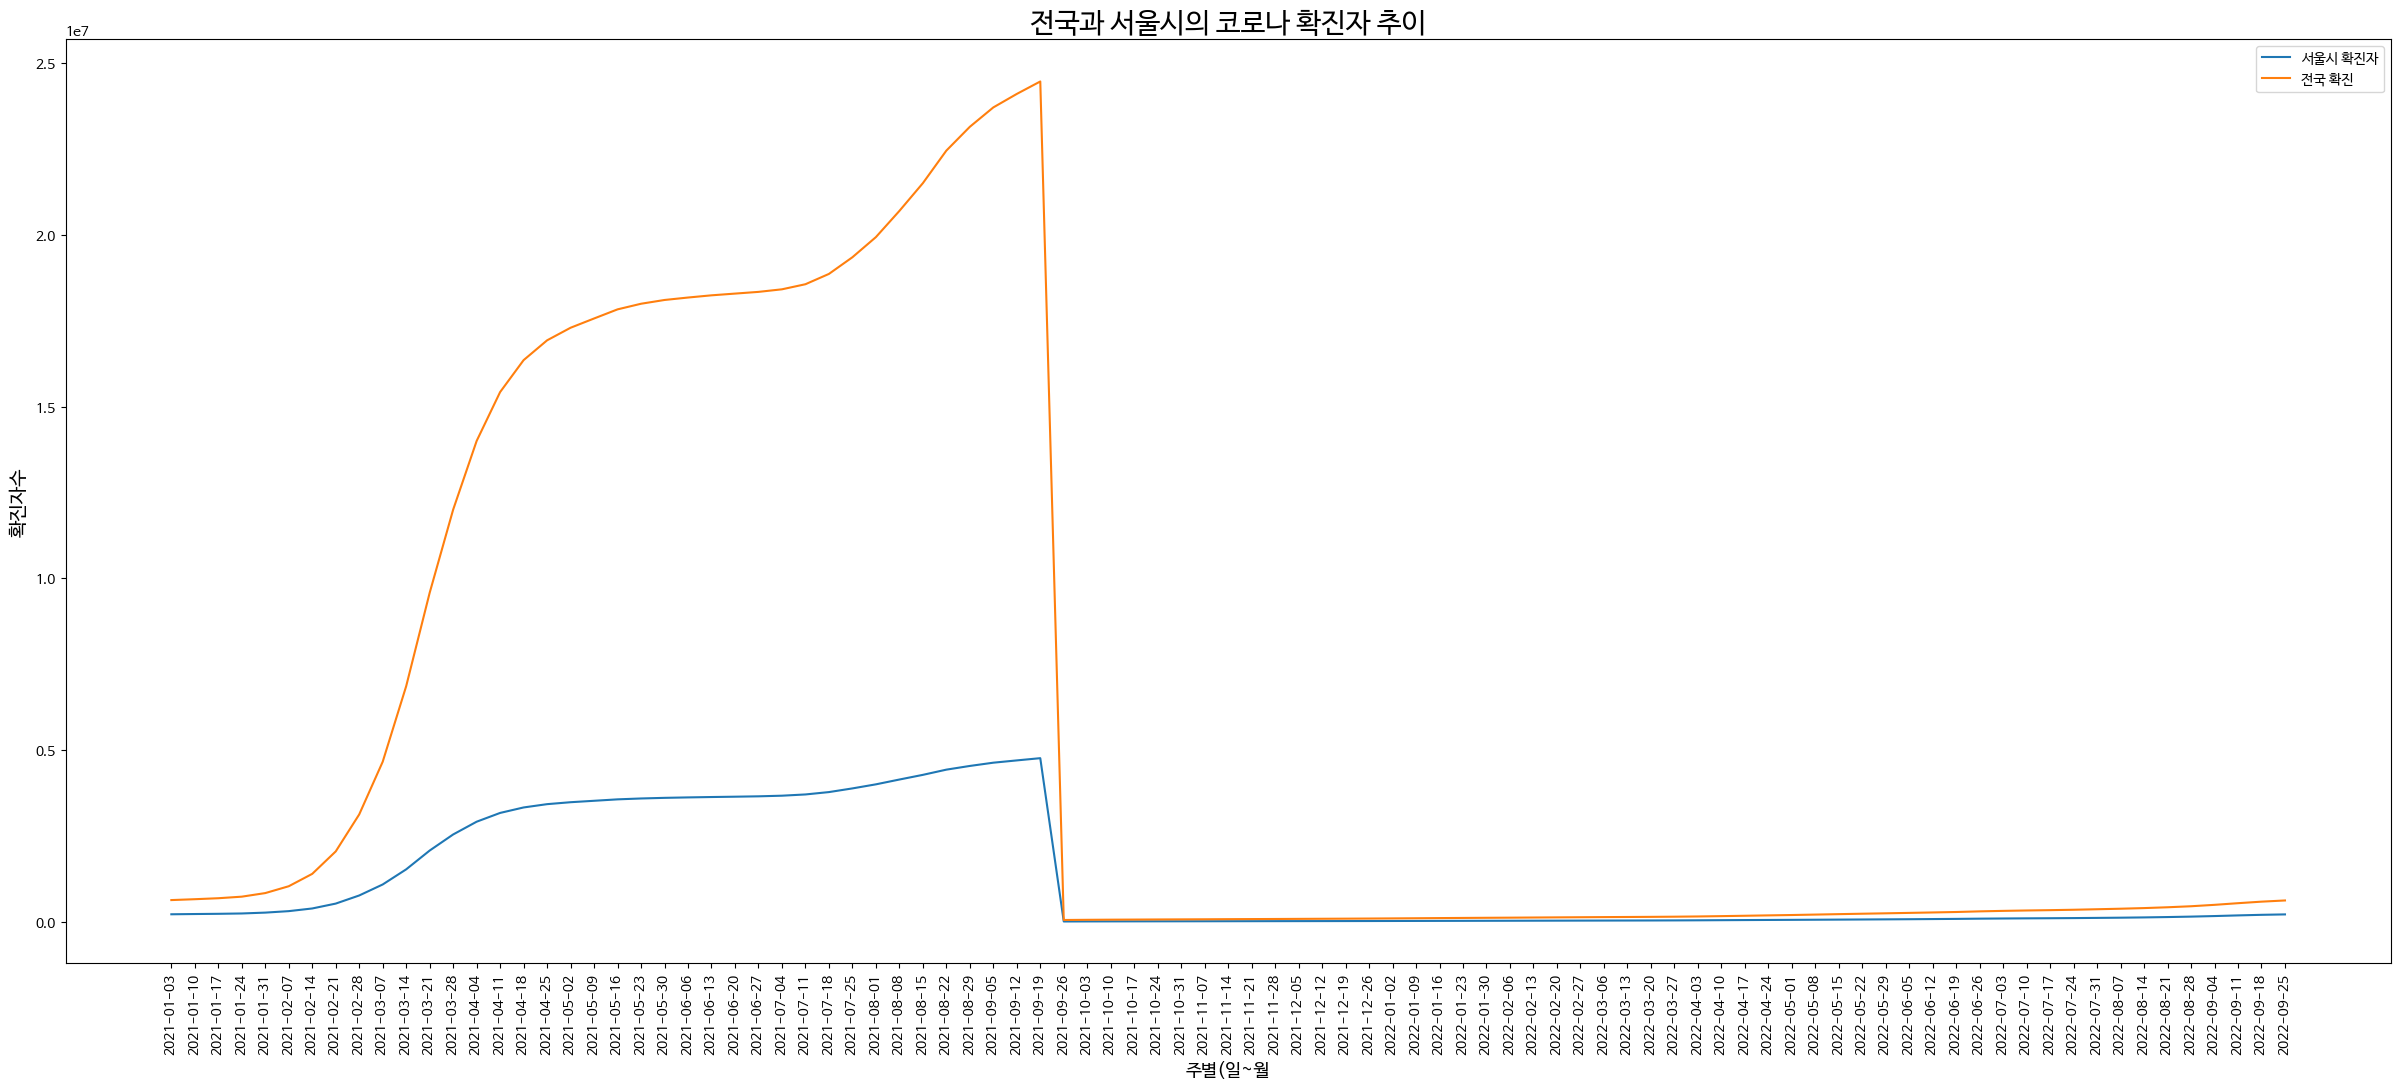

In [ ]:
df_name = weekly_covid.columns                                     #weekly_covid(주 간격 피벗테이블)을 df_name에 저장

plt.figure(figsize = (30, 12))                                     #그래프 크기(가로 길이, 세로 길이)
for df in df_name:                                                 # df값 = 서울시 확진자, 전국 확진 - 각 컬럼에 해당하는 그래프를 for문을 돌면서 각각 그림
    plt.plot(weekly_covid[df], label = df)                         # 데이터 가져오기 - x축 : weekly_covid, y축 : label = df
    plt.legend()                                                   #범례표시, 이전에 label을 이용해 범례의 이름을 정해줘야 함
    plt.title('전국과 서울시의 코로나 확진자 추이', fontsize = 20) #그래프 제목, 글씨체 크기 설정 
    plt.xlabel('주별(일~월', fontsize = 13)                        #x축 제목 설정 
    plt.ylabel('확진자수', fontsize = 14)                          #y축 제목 설정 
    plt.xticks(weekly_covid.index.to_list() , rotation=90)         #x축 간격, rotation = 글씨 90도로 돌리기(x축 레이블 90도 회전)
               # weekly_covid의 인덱스 값(서울시 기준일)을 리스트로 변환 
               # Q.리스트로 변환하는 이유?